<a href="https://colab.research.google.com/github/navicester/TianChi-SJTU-Boot-Camp/blob/main/5%E3%80%81%E5%AE%9E%E6%88%98%E7%BB%83%E4%B9%A0%EF%BC%88%E4%B8%80%EF%BC%89/%E8%AF%BE%E6%97%B625%20%E8%82%A1%E7%A5%A8%E6%8A%95%E8%B5%84%E7%BB%84%E5%90%88%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.5  股票投资组合分析

通过以上章节的学习，相信大家已经对于python基础，和pandas,numpy,matplotlib等常用的数据分析包有了一定的认识，本节将通过一个偏实践的股票投资组合分析的案例来帮忙理解这些编程技术的应用。

众所周知，金融市场总是变幻莫测，充满了不确定性，金融资产涨跌的背后存在着许多影响因素。投资者所关注的则是能够找到应对的方法来减少投资的风险并且最大程度增加收益。

其中一种应对方法就是本节将要探讨的投资组合优化问题，指的是研究在不确定环境下如何理性购买并合理配置金融产品，从而实现收益率与风险间的均衡。其核心思想就是不把所有的鸡蛋放进同一篮子里面，即研究在资金有限和期望收益不确定的情况下，投资者该如何分配现有的资金，从而规避掉金融市场中的风险，实现收益最大化。

要实现优化投资就要对投资进行量化。量化投资就是利用计算机科技并采用一定的模型去践行投资理念，实现投资策略的过程。相比传统投资，量化投资有着更强的纪律性、系统性、及时性、准确性等，能够尽量避免人为因素的干扰，从而高效执行策略。

本文参考资料：https://blog.csdn.net/asialee_bird/article/details/89417750  
其他推荐材料：
- 量化学习材料 https://zhuanlan.zhihu.com/p/21563644  
- python金融大数据 https://book.douban.com/subject/26670241/

## 0. 金融数据接口
本节会使用证券宝开源金融数据平台作为数据源，证券宝([www.baostock.com](www.baostock.com)) 是一个完全免费的数据平台，用户可以通过python API获取证券数据信息。  
所有该网站提供的接口信息都可以在以下链接看到：[http://baostock.com/baostock/index.php/Python_API%E6%96%87%E6%A1%A3](http://baostock.com/baostock/index.php/Python_API%E6%96%87%E6%A1%A3)  
此外还有一些其他python金融接口平台可供选择，[AKshare](https://akshare-4gize6tod19f2d2e-1252952517.tcloudbaseapp.com/index.html), [tushare](https://tushare.pro/document/2)。

## 0.1 接口功能介绍
- BaoStock提供了大量准确、完整的证券历史行情数据、上市公司财务数据等。
- 通过python API获取证券数据信息，满足量化交易投资者、数量金融爱好者、计量经济从业者数据需求。
- 返回的数据格式为pandas DataFrame类型，以便于用pandas/NumPy/Matplotlib进行数据分析和可视化。

提供的数据范围包括：  
- **股票数据**：
  - 日、周、月K线数据
  - 5、15、30、60分钟K线数据
- **指数数据**：
  - 日、周、月K线已经包含指数：综合指数，规模指数，一级行业指数，二级行业指数，策略指数，成长指数，价值指数，主题指数，基金指数，债券指数
- **季频财务数据**：
  - 已经包含的财务数据：部分上市公司资产负债信息、上市公司现金流量信息、上市公司利润信息、上市公司杜邦指标信息
- **季频公司报告**：
  - 上市公司业绩预告信息
  - 上市公司业绩快报信息
- **宏观经济数据**
  - 存款利率，贷款利率等
- **板块数据**
  - 行业分类信息
  - 成分股数据如上证50成分股

## 0.2 接口使用
1. BaoStock安装  
>pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

In [17]:
!pip install baostock -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!python --version
#!pip install baostock #直接在notebook中安装，如已安装包则略过这一步
#print(baostock.__version__)

Python 3.7.13


安装相关软件包后，需要按下图所示操作，重启下编程环境就可以加载自己安装的包啦。
<img src="https://img.alicdn.com/imgextra/i4/O1CN01NgdOUf1TnbuZKn48O_!!6000000002427-2-tps-586-223.png" width=70%>

2. 包的导入和登录  
>import baostock as bs  
lg = bs.login()

3. 接口调用（以K线数据为例）  
通过API接口获取A股历史交易数据，可以通过参数设置获取日k线、周k线、月k线，以及5分钟、15分钟、30分钟和60分钟k线数据，适合搭配均线数据进行选股和分析。  
获取历史A股K线数据的命令为query_history_k_data_plus()  
这个命令有几个参数可供选择，参数含义如下：
>**code**：股票代码，sh或sz.+6位数字代码，或者指数代码，如：sh.601398。sh：上海；sz：深圳。此参数不可为空；  
**fields**：指示简称，支持多指标输入，以半角逗号分隔，填写内容作为返回类型的列。详细指标列表见历史行情指标参数章节，日线与分钟线参数不同。此参数不可为空；  
**start**：开始日期（包含），格式“YYYY-MM-DD”，为空时取2015-01-01；  
**end**：结束日期（包含），格式“YYYY-MM-DD”，为空时取最近一个交易日；  
**frequency**：数据类型，默认为d，日k线；d=日k线、w=周、m=月、5=5分钟、15=15分钟、30=30分钟、60=60分钟k线数据，不区分大小写；指数没有分钟线数据；周线每周最后一个交易日才可以获取，月线每月最后一个交易日才可以获取。  
**adjustflag**：复权类型，默认不复权：3；1：后复权；2：前复权。已支持分钟线、日线、周线、月线前后复权。 BaoStock提供的是涨跌幅复权算法复权因子

## 1.  股票数据准备

## 1.1  股票接口数据导入，获取收盘价信息

In [3]:
# 导入相关包，登录证券宝准备获取接口
import baostock as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
lg = bs.login()

login success!


In [4]:
# 定义获取收盘价的函数，需要传入股票代码作为参数，时间范围选择2020整年
def query_data(code):
    rs = bs.query_history_k_data(code,
      "date,close",
      start_date='2020-01-01', end_date='2020-12-31', 
      frequency="d", adjustflag="3") # 该函数可以获取更多参数，本节只选择抓取日期和收盘价两个字段
    data_list = []
    while (rs.error_code == '0') & rs.next():
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields)
    result.rename(columns={'close':code},inplace=True) # 以股票代码作为收盘价的列名
    result.set_index('date',inplace=True)  # 设置日期作为索引
    return result

In [5]:
# 任意选择5只股票，可以自行调整为感兴趣的股票代码
code_list=["sh.600009","sz.000338","sh.601888","sz.000568","sz.300059"]
StockPrices=pd.DataFrame([])
for code in code_list:  # 循环遍历获取上面列表中的5只股票数据，并合并成一个dataframe
    StockPrices=StockPrices.join(query_data(code),how='outer')  

In [6]:
# 后面计算需要，转换成浮点数格式
for col in StockPrices.columns:
    StockPrices[col]=StockPrices[col].astype(float)

In [7]:
# 观察结果
StockPrices.head()

,sh.600009,sz.000338,sh.601888,sz.000568,sz.300059
date,,,,,
2020-01-02,77.36,16.16,90.05,85.45,15.90
2020-01-03,77.30,16.42,90.98,85.79,16.00
2020-01-06,75.60,15.19,90.00,85.62,16.15
2020-01-07,75.25,15.29,90.91,86.00,16.14
2020-01-08,75.06,14.77,91.30,84.85,15.54


## 1.2  计算股票的日收益率

In [8]:
# 计算下一交易日对比上一交易日的日收益率，去除第一行
StockReturns = StockPrices.pct_change().dropna()

dropna: Remove missing values.

In [9]:
# 观察结果
StockReturns.head()

,sh.600009,sz.000338,sh.601888,sz.000568,sz.300059
date,,,,,
2020-01-03,-0.000776,0.016089,0.010328,0.003979,0.006289
2020-01-06,-0.021992,-0.074909,-0.010772,-0.001982,0.009375
2020-01-07,-0.004630,0.006583,0.010111,0.004438,-0.000619
2020-01-08,-0.002525,-0.034009,0.004290,-0.013372,-0.037175
2020-01-09,0.006661,0.013541,0.029573,0.031232,0.030245


## 2.  投资组合的收益计算
在选定几只股票后，应该确定权重呢？下面我们采用三种权重分配的方案，来计算不同组合下的投资收益。
另外，本节作为简化，只是任意选择了5只股票，但实践中往往我们面临的选择会非常多，因此需要进行更多关于投资标的的分析探索。

## 2.1  给定权重的投资组合
第一种方案是根据经验或习惯预先设置一组权重（所有股票权重的和为1）

In [10]:
# 将收益率数据拷贝到新的变量 stock_return 中，这三种权重方法会多次调用
stock_return = StockReturns.copy()
# 设置组合权重，存储为numpy数组类型
portfolio_weights = np.array([0.2, 0.15, 0.1, 0.18, 0.47])
# 计算加权的股票收益，数据框乘法
WeightedReturns = stock_return.mul(portfolio_weights, axis=1)

In [11]:
# 观察加权后的日收益率
WeightedReturns.head()

,sh.600009,sz.000338,sh.601888,sz.000568,sz.300059
date,,,,,
2020-01-03,-0.000155,0.002413,0.001033,0.000716,0.002956
2020-01-06,-0.004398,-0.011236,-0.001077,-0.000357,0.004406
2020-01-07,-0.000926,0.000987,0.001011,0.000799,-0.000291
2020-01-08,-0.000505,-0.005101,0.000429,-0.002407,-0.017472
2020-01-09,0.001332,0.002031,0.002957,0.005622,0.014215


In [12]:
# 计算投资组合的收益，将加权后的日收益率相加
StockReturns['Given_weight'] = WeightedReturns.sum(axis=1)

            sh.600009  sz.000338  sh.601888  sz.000568  sz.300059  \
date                                                                
2020-01-03  -0.000776   0.016089   0.010328   0.003979   0.006289   
2020-01-06  -0.021992  -0.074909  -0.010772  -0.001982   0.009375   
2020-01-07  -0.004630   0.006583   0.010111   0.004438  -0.000619   
2020-01-08  -0.002525  -0.034009   0.004290  -0.013372  -0.037175   
2020-01-09   0.006661   0.013541   0.029573   0.031232   0.030245   

            Given_weight  
date                      
2020-01-03      0.006963  
2020-01-06     -0.012662  
2020-01-07      0.001581  
2020-01-08     -0.025056  
2020-01-09      0.026157  


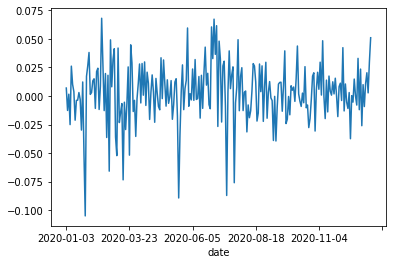

In [13]:
# 观察结果，增加了一列组合收益率
print(StockReturns.head()) 
# 绘制组合收益随时间变化图
StockReturns.Given_weight.plot()

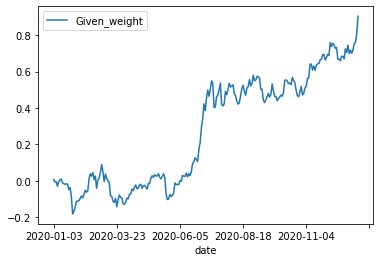

In [14]:
# 定义累积收益曲线绘制函数
def cumulative_returns_plot(plot_column):
    for col in plot_column:
        CumulativeReturns = ((1+StockReturns[col]).cumprod()-1)
        CumulativeReturns.plot(label=col)
    plt.legend()
# 计算累积的组合收益，并绘图
cumulative_returns_plot(['Given_weight'])

从累计收益率看到，投资组合在2020年初经历了较大的回撤，从4月份开始回暖，并且分别在年中和年底时经历了收益快速上涨。

## 2.2  等权重的投资组合
第二种方案是平均分配每支股票的权重，使它们都相等。这是最简单的投资方法，可作为其他投资组合的参考基准。

In [15]:
# 设置投资组合中股票的数目
numstocks = 5
# 平均分配每一项的权重
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)
# 计算等权重组合的收益
StockReturns['Equal_weight'] = stock_return.mul(portfolio_weights_ew, axis=1).sum(axis=1)

            sh.600009  sz.000338  sh.601888  sz.000568  sz.300059  \
date                                                                
2020-01-03  -0.000776   0.016089   0.010328   0.003979   0.006289   
2020-01-06  -0.021992  -0.074909  -0.010772  -0.001982   0.009375   
2020-01-07  -0.004630   0.006583   0.010111   0.004438  -0.000619   
2020-01-08  -0.002525  -0.034009   0.004290  -0.013372  -0.037175   
2020-01-09   0.006661   0.013541   0.029573   0.031232   0.030245   

            Given_weight  Equal_weight  
date                                    
2020-01-03      0.006963      0.007182  
2020-01-06     -0.012662     -0.020056  
2020-01-07      0.001581      0.003177  
2020-01-08     -0.025056     -0.016558  
2020-01-09      0.026157      0.022250  


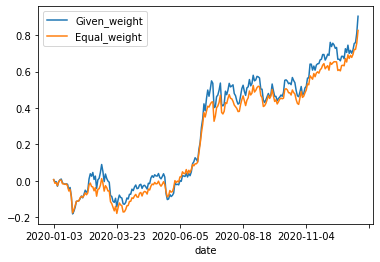

In [16]:
# 观察结果，增加了一列等权重的组合收益率
print(StockReturns.head())
# 绘制累积收益曲线
cumulative_returns_plot(['Given_weight', 'Equal_weight'])

## 2.3  市值加权的投资组合
第三种法案是考虑了股票的市值，按市值的占比来分配权重。因此市值高的股票对应的权重就更大，这种策略更加偏向于投资蓝筹股。  
由于证券宝没有提供股票市值参数，因此手动查询这5只股票在当前时刻下的市值作为权重。  
**注：更严谨的做法应该是获取股票每天的市值序列带入计算，此处做了简化。**

In [18]:
# 手动查询市值（亿）
market_value_list = [1233,1910,6462,4089,3174]
#将上述获得的每支股票的平均市值转换为数组
market_values=np.array(market_value_list)
# 计算市值权重
market_weights = market_values / np.sum(market_values)
# 计算市值加权的组合收益
StockReturns['MarketValue_weight'] = stock_return.mul(market_weights, axis=1).sum(axis=1)

            sh.600009  sz.000338  sh.601888  sz.000568  sz.300059  \
date                                                                
2020-01-03  -0.000776   0.016089   0.010328   0.003979   0.006289   
2020-01-06  -0.021992  -0.074909  -0.010772  -0.001982   0.009375   
2020-01-07  -0.004630   0.006583   0.010111   0.004438  -0.000619   
2020-01-08  -0.002525  -0.034009   0.004290  -0.013372  -0.037175   
2020-01-09   0.006661   0.013541   0.029573   0.031232   0.030245   

            Given_weight  Equal_weight  MarketValue_weight  
date                                                        
2020-01-03      0.006963      0.007182            0.007870  
2020-01-06     -0.012662     -0.020056           -0.012932  
2020-01-07      0.001581      0.003177            0.005240  
2020-01-08     -0.025056     -0.016558           -0.012629  
2020-01-09      0.026157      0.022250            0.026611  


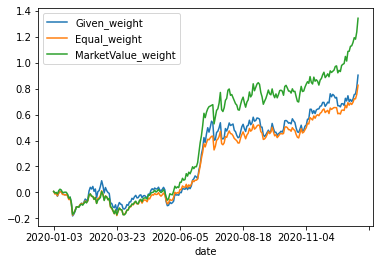

In [19]:
# 观察结果，增加了一列市值加权的组合收益率
print(StockReturns.head())
# 绘制累积收益曲线
cumulative_returns_plot(['Given_weight', 'Equal_weight', 'MarketValue_weight'])

从结果上看到，市值加权的投资组合在这三组组合中收益率最高，当然这不代表市值加权权重的方法在任何时候都是最优的，面对不同场景需要进行具体分析。

## 3.  投资组合的相关性分析

## 3.1  投资组合的相关矩阵
股票之间是存在一定的相关性的，例如同一板块的股票往往相关性就较强，更倾向于同涨同跌。而相关矩阵正是用于估算多支股票收益之间的线性关系的。

In [20]:
# 计算相关矩阵
correlation_matrix = stock_return.corr()
# 输出相关矩阵
correlation_matrix

,sh.600009,sz.000338,sh.601888,sz.000568,sz.300059
sh.600009,1.000000,0.429897,0.362432,0.408412,0.349592
sz.000338,0.429897,1.000000,0.273345,0.378987,0.503662
sh.601888,0.362432,0.273345,1.000000,0.421901,0.387332
sz.000568,0.408412,0.378987,0.421901,1.000000,0.410365
sz.300059,0.349592,0.503662,0.387332,0.410365,1.000000


矩阵中每一个元素都是其对应股票的相关系数，取值从-1到1，正数代表正相关，负数代表负相关。数值的绝对值越大，相关性越强。  

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

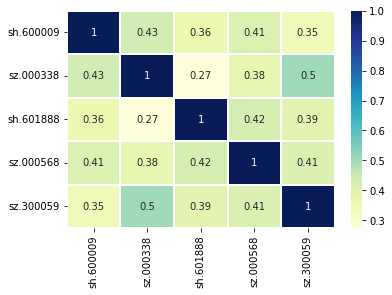

In [21]:
#创建热力图，可视化相关关系矩阵
sns.heatmap(correlation_matrix,annot=True,linewidths=1.0,annot_kws={'size':10},cmap="YlGnBu")
plt.xticks(rotation=90)
plt.yticks()

## 3.2  投资组合的协方差矩阵
相关系数只反应了股票之间的线性关系，为了进一步获取股票的波动情况，需要引入协方差矩阵。  
方差是用来度量某一个随机变量波动情况的统计量，而协方差则是一种用来度量两个随机变量关系的统计量。

In [22]:
# 计算协方差矩阵
cov_mat = stock_return.cov()
# 年化协方差矩阵
cov_mat_annual = cov_mat * 252
# 输出协方差矩阵
cov_mat_annual

,sh.600009,sz.000338,sh.601888,sz.000568,sz.300059
sh.600009,0.122412,0.059422,0.073215,0.063170,0.070017
sz.000338,0.059422,0.156075,0.062350,0.066190,0.113904
sh.601888,0.073215,0.062350,0.333363,0.107689,0.128019
sz.000568,0.063170,0.066190,0.107689,0.195434,0.103849
sz.300059,0.070017,0.113904,0.128019,0.103849,0.327691


## 3.3 投资组合的标准差
投资组合的风险可以用标准差来衡量，只要知道组合权重和协方差矩阵，就可以通过以下公式进行计算。  
$\sigma=\sqrt {\omega_T \cdot \sum \cdot \, \omega} $  
其中 $\omega $  为投资组合的权重矩阵转置  
$\omega_T $  为投资组合的权重矩阵转置  
$\sum $  为投资收益的协方差矩阵


In [23]:
# 计算投资组合的年化标准差
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
portfolio_volatility

0.4118900214655031

## 4.  探索股票的最优投资组合
有了以上的计算结果作为基础，就可以着手模拟最优投资组合了。  
我们将用到诺贝尔经济学奖得主马科维茨（Markowitz）提出的[投资组合理论](https://wiki.mbalib.com/wiki/%E6%8A%95%E8%B5%84%E7%BB%84%E5%90%88%E7%90%86%E8%AE%BA)。该理论包含两个重要概念，均值-方差分析法和投资组合有效边界模型。

投资组合理论用均值-方差来刻画投资中收益和风险这两个关键因素。所谓均值，是指投资组合的期望收益率，它是单只证券的期望收益率的加权平均。所谓方差，是指投资组合的收益率的方差。我们把收益率的标准差称为波动率，它刻画了投资组合的风险。

把一系列投资组合在以波动率为横坐标，收益率为纵坐标的二维平面中描绘出来，形成一条曲线。这条曲线上有一个点，其波动率最低，称之为最小方差点(MVP)。这条曲线在最小方差点以上的部分就是著名的(马考维茨)投资组合有效边界，对应的投资组合称为有效投资组合。投资组合有效边界是一条单调递增的凹曲线。

## 4.1  使用蒙特卡洛模拟Markowitz模型
下面将采用蒙特卡洛模拟来进行分析，也就是随机生成一组权重，计算该组合下的收益和标准差，重复这一过程许多次（比如1万次），将每一种组合的收益和标准差绘制成散点图。通过构建大量的模拟样本权重，可以为我们描述出所有可能下投资组合的全貌。

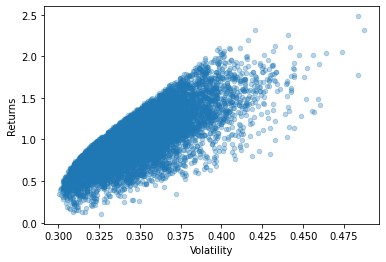

In [ ]:
# 设置模拟的次数
number = 10000
# 设置空的numpy数组，用于存储每次模拟得到的权重、收益率和标准差
random_p = np.empty((number, 7))
# 设置随机数种子，这里是为了结果可重复
np.random.seed(42)
 
#循环模拟10000次随机的投资组合
for i in range(number):
    #生成5个随机数，并归一化，得到一组随机的权重数据
    random5=np.random.random(5)
    random_weight=random5/np.sum(random5)
 
    #计算年平均收益率
    mean_return=stock_return.mul(random_weight,axis=1).sum(axis=1).mean()
    annual_return=(1+mean_return)**252-1
 
    #计算年化标准差，也成为波动率
    random_volatility=np.sqrt(np.dot(random_weight.T,np.dot(cov_mat_annual,random_weight)))
 
    #将上面生成的权重，和计算得到的收益率、标准差存入数组random_p中
    random_p[i][:5]=random_weight
    random_p[i][5]=annual_return
    random_p[i][6]=random_volatility

# 将Numpy数组转化为DataFrame数据框
RandomPortfolios=pd.DataFrame(random_p)
#设置数据框RandomPortfolios每一列的名称
RandomPortfolios.columns=[ticker +'_weight' for ticker in code_list]+['Returns','Volatility']
 
#绘制散点图
RandomPortfolios.plot('Volatility','Returns',kind='scatter',alpha=0.3)

## 4.2  投资风险最小组合
根据马考维茨理论，在所有投资组合中可以找到一个方差最小的点，该点以上的部分被称为投资组合有效边界。  
因此让我们找到风险最小的组合，并绘制在代表收益-风险的散点图中。

Text(0.3007, 0.3394, '(0.3007, 0.3394)')

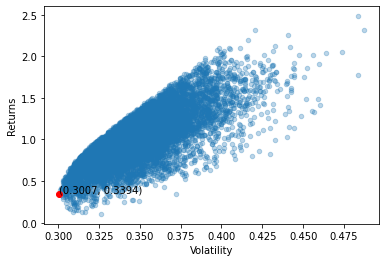

In [ ]:
# 找到标准差最小数据的索引值
min_index = RandomPortfolios.Volatility.idxmin()
 
# 在收益-风险散点图中突出风险最小的点
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[min_index,'Volatility']
y = RandomPortfolios.loc[min_index,'Returns']
plt.scatter(x, y, color='red')
#将该点坐标显示在图中并保留四位小数
plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=10)

In [ ]:
# 提取最小波动组合对应的权重, 并转换成Numpy数组
GMV_weights = np.array(RandomPortfolios.iloc[min_index, 0:numstocks])
# 计算最小风险投资组合收益
StockReturns['GMV_portfolio'] = stock_return.mul(GMV_weights, axis=1).sum(axis=1)
#输出风险最小投资组合的权重
GMV_weights

array([0.44112247, 0.33894984, 0.06051495, 0.15163696, 0.00777577])

## 4.3  投资最优组合
基于夏普比率的方法为我们提供了确定最优投资组合的另一种思路。  

夏普比率(Sharpe Ratio)是由诺贝尔奖得主威廉·夏普提出的，用以帮助投资者比较投资的回报和风险。  
这一理论的核心思想是：理性的投资者将选择并持有有效的投资组合，即那些在给定的风险水平下使期望回报最大化的投资组合，或那些在给定期望回报率的水平上使风险最小化的投资组合。

夏普比率计算公式如下：  

$Sharpe \, Ratio = \frac{R_p-R_f}{\sigma_p}$   
其中$R_p$为预期收益率，$R_f$为无风险利率，$\sigma_p$为超额收益的标准差。  

夏普指数代表投资人每多承担一分风险，可以拿到几分报酬；若为正值，代表基金报酬率高过波动风险；若为负值，代表基金操作风险大过于报酬率。因此夏普理论告诉我们，投资时也要比较风险，尽可能用科学的方法以冒小风险来换大回报。这个比率越高，投资组合越佳。  

只要将超额回报的均值除以其标准差，即可得到衡量回报和风险的夏普比率。另外需再乘上$\sqrt{252}$ （一年有252个交易日），得到年化的夏普比率。

我们首先来计算上述蒙特卡洛模拟的组合所对应的夏普比率，并将之作为第三个变量绘制在收益-风险的散点图中，这里采用颜色这一视觉线索来表征夏普比率。接着找到最优化的投资组合点。

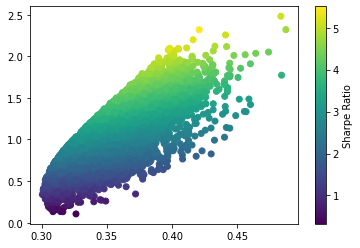

In [ ]:
# 设置无风险回报率为0，你也可以替换为国债利率
risk_free = 0
# 计算每项资产的夏普比率
RandomPortfolios['Sharpe'] = (RandomPortfolios.Returns - risk_free) / RandomPortfolios.Volatility
# 绘制收益-标准差的散点图，并用颜色描绘夏普比率
plt.scatter(RandomPortfolios.Volatility, RandomPortfolios.Returns, c=RandomPortfolios.Sharpe)
plt.colorbar(label='Sharpe Ratio')

Text(0.4208, 2.3186, '(0.4208, 2.3186)')

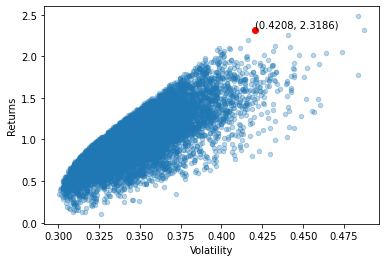

In [ ]:
# 找到夏普比率最大数据对应的索引值
max_index = RandomPortfolios.Sharpe.idxmax()
# 在收益-风险散点图中突出夏普比率最大的点
RandomPortfolios.plot('Volatility', 'Returns', kind='scatter', alpha=0.3)
x = RandomPortfolios.loc[max_index,'Volatility']
y = RandomPortfolios.loc[max_index,'Returns']
plt.scatter(x, y, color='red')
#将该点坐标显示在图中并保留四位小数
plt.text(np.round(x,4),np.round(y,4),(np.round(x,4),np.round(y,4)),ha='left',va='bottom',fontsize=10)

In [ ]:
# 提取最大夏普比率组合对应的权重，并转化为numpy数组
MSR_weights = np.array(RandomPortfolios.iloc[max_index, 0:numstocks])
# 计算MSR组合的收益
StockReturns['MSR_portfolio'] = stock_return.mul(MSR_weights, axis=1).sum(axis=1)
#输出夏普比率最大的投资组合的权重
MSR_weights

array([0.00819978, 0.00935703, 0.46576801, 0.49385056, 0.02282462])